# Heart diseases prediction

### Research goals
- Practising on a real medical data
- Sharpen building prediction models skill
- Familiarize with kaggle, acquire new knowledge and approaches from other participants

### Research progress
- Data acquisition and initial analysis
- Check for duplicates and gaps, correct where it's possible
- Check data for anomalies
- Correlation analysis
- Data preprocessing and cleaning
- Train and compare models

## Data acquisition and initial analysis

In [190]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from pickle import dump

In [191]:
RANDOM_VAL = 12345

In [192]:
df_train = pd.read_csv('/kaggle/input/yap15-heart-diseases-predictions/train.csv')
df_test = pd.read_csv('/kaggle/input/yap15-heart-diseases-predictions/test.csv')

df_train.info()
print()
df_test.info()
print()
display(df_train.head())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id         

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [193]:
print('df_train unique count:')
print(df_train.nunique())
print()
print('df_test unique count:')
print(df_test.nunique())
print()

binary_features = ['gender','smoke','alco','active']

df_train unique count:
id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

df_test unique count:
id             30000
age             7244
gender             2
height            87
weight           203
ap_hi            134
ap_lo            113
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
dtype: int64



* All the data loaded smoothly without any glitches, data files seems ok don't contain any corruptions.
* Datasets don't contain any explicit duplicates and don't need any data types correction.
* Columns 'smoke','alco','active','gender' designeted as binary features containers.

## Check for duplicates and gaps, correct where it's possible

In [194]:
print('df_train duplicates:', df_train.duplicated().sum())
print('df_test duplicates:', df_test.duplicated().sum())
print()
print('explicit gaps:', df_train.isna().sum())
print()

display(df_train.describe())

print()
print(df_train['cholesterol'].value_counts())
print()
print(df_train['gluc'].value_counts())

df_train duplicates: 0
df_test duplicates: 0

explicit gaps: id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

1    59479
3     5331
2     5190
Name: gluc, dtype: int64


In [195]:
df_combine = [df_train, df_test]

for df in df_combine:
    df['age'] = (df['age'] / 365).astype(int)
    df['gender'] -= 1
    df['cholesterol'] -= 1
    df['gluc'] -= 1

In [196]:
for df in df_combine:
    df['smoke'] = df['smoke'].astype(bool)
    df['gender'] = df['gender'].astype(bool)
    df['alco'] = df['alco'].astype(bool)
    df['active'] = df['active'].astype(bool)

In [197]:
df_train['cardio'] = df_train['cardio'].astype(bool)

* There are no explicit gaps or duplicates in data.
* Besides data was checked for implicit gaps (like there's, for instance, no age or weigth with 0 value).

## Check data for anomalies

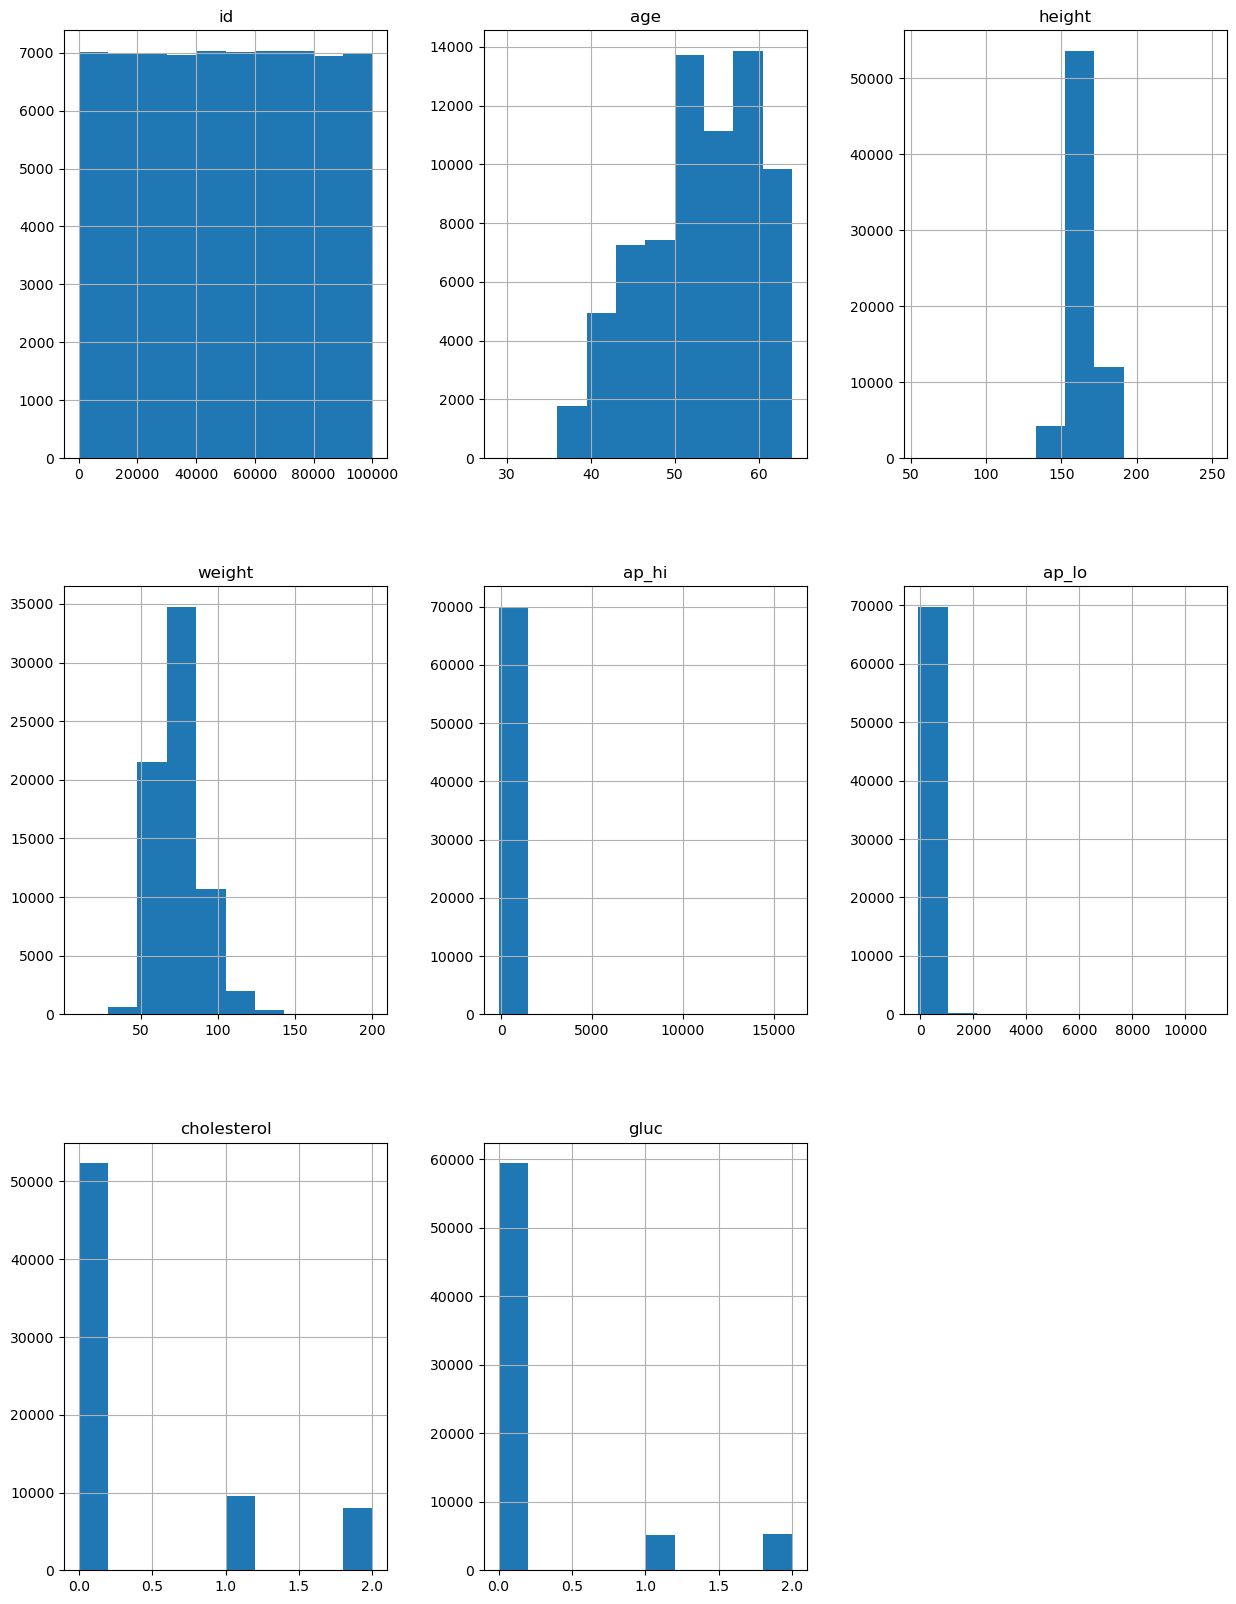

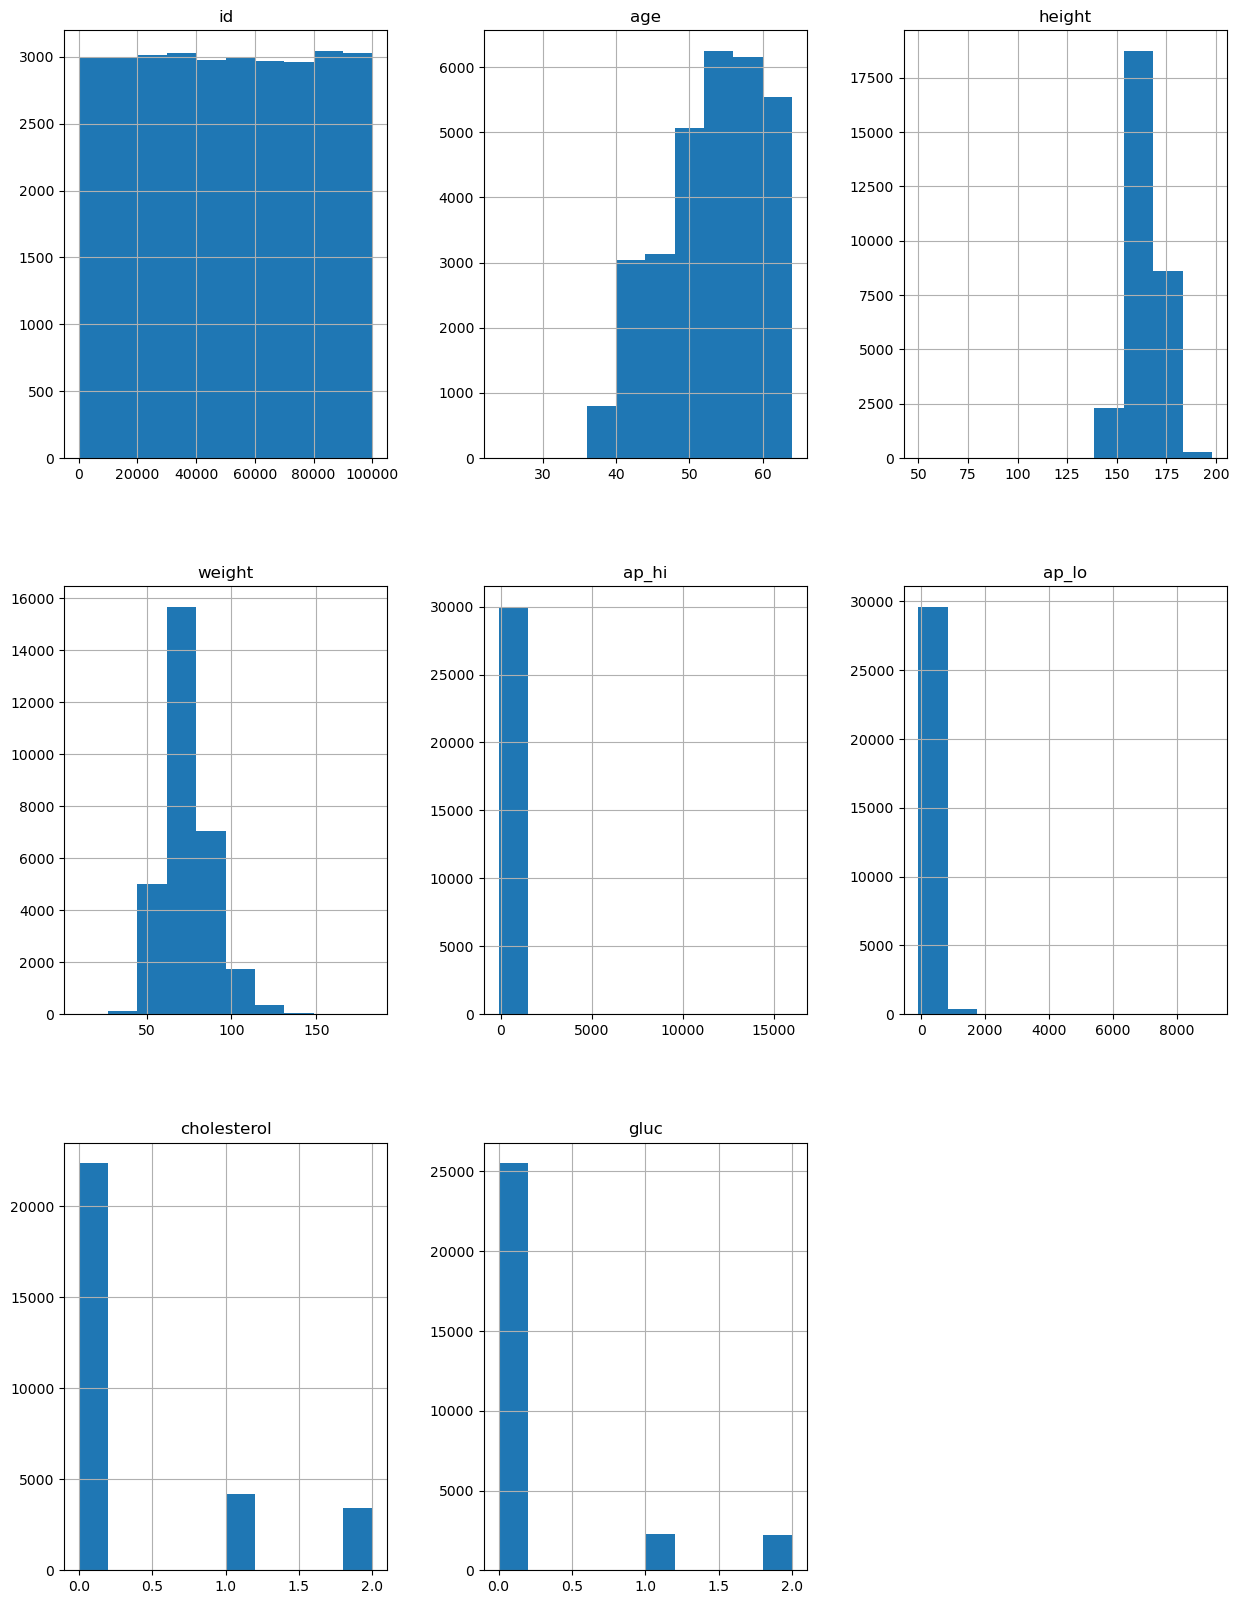

In [198]:
df_train.hist(figsize=(15,20))
plt.show()

df_test.hist(figsize=(15,20))
plt.show()

* Looks like all the data contain no noticeable anomalies. However some of feature are highly imbalanced (like "smoke" or "alco" columns) which may have some impact at the training pahase.

## Correlation analysis

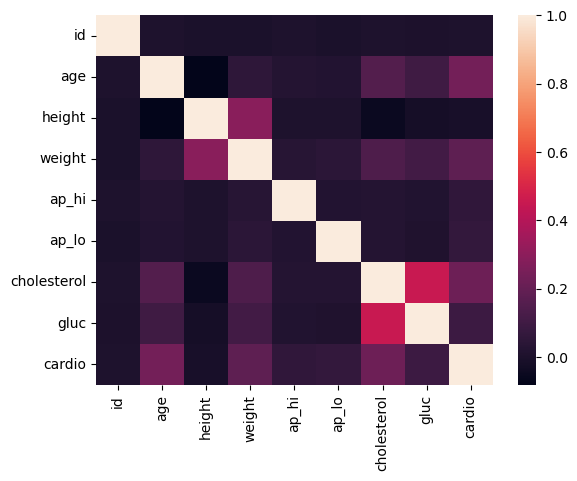

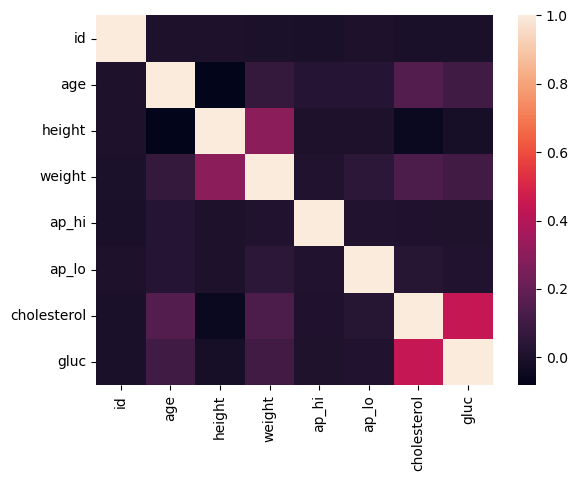

In [199]:
sns.heatmap(df_train.drop(binary_features, axis=1).corr())
plt.show()
sns.heatmap(df_test.drop(binary_features, axis=1).corr())
plt.show()

Binary features were rulled out from correlation matrix. Features left there show more or less expectable correlation picture.
* There is a high correlation between weight and heigth (which is obvious)
* Level of cholesterol is higly correlated to glucose level
* Cholesterol is also has correlation to weight and age, glucose also has that correlation but a bit less

In [200]:
print('cardio and smoke:', chi2_contingency(pd.crosstab(index=df_train['cardio'], columns=df_train['smoke']))[1])
print('cardio and alco:', chi2_contingency(pd.crosstab(index=df_train['cardio'], columns=df_train['alco']))[1])
print('cardio and active:', chi2_contingency(pd.crosstab(index=df_train['cardio'], columns=df_train['active']))[1])
print('cardio and gender:', chi2_contingency(pd.crosstab(index=df_train['cardio'], columns=df_train['gender']))[1])

cardio and smoke: 4.4293623605077656e-05
cardio and alco: 0.05452518218322108
cardio and active: 4.3651927285329286e-21
cardio and gender: 0.03254570031936317


In [201]:
display(df_train[['cardio', 'cholesterol']].groupby(['cholesterol']).mean())
display(df_train[['cardio', 'smoke']].groupby(['smoke']).mean())
display(df_train[['cardio', 'alco']].groupby(['alco']).mean())
display(df_train[['cardio', 'active']].groupby(['active']).mean())
display(df_train[['cardio', 'gender']].groupby(['gender']).mean())

,cardio
cholesterol,
0,0.440107
1,0.602157
2,0.765435


,cardio
smoke,
False,0.502107
True,0.474793


,cardio
alco,
False,0.500574
True,0.484325


,cardio
active,
False,0.535774
True,0.490891


,cardio
gender,
False,0.496727
True,0.505231


For binary features 0 hypothesis is asumed like "columns are not related to each other".\
Which is mainly true by Chi Square test except "cardio and active" test where p-value is greater then 5% which means there is a correlation.

## Data preprocessing and cleaning

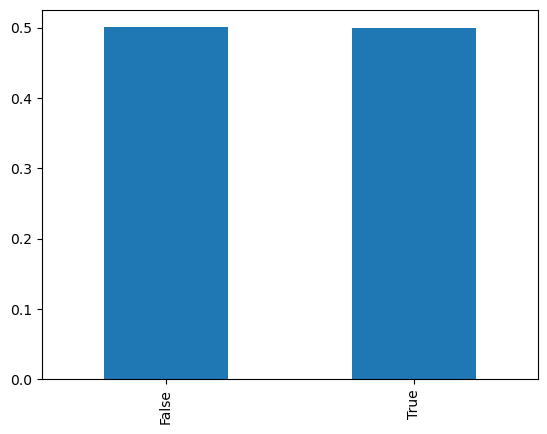

In [202]:
df_train['cardio'].value_counts(normalize=df_train.shape[1]/2).plot(kind='bar')
plt.show()

Classes are well-balanced in train dataset.

In [203]:
def resample_features(src_df, min_items, group_name):
    df_grouped = src_df.groupby(group_name)[group_name].agg('count')
    target_min_num = df_grouped[df_grouped > min_items].min()
    target_gr_val = df_grouped[df_grouped == target_min_num].index[0]

    df_res = src_df[src_df[group_name] == target_gr_val]

    for gr_value, gr_num in df_grouped.items():
        if (gr_num >= target_min_num and gr_value != target_gr_val):
            target_frac = target_min_num / gr_num
            src_df_filtered = src_df[src_df[group_name] == gr_value]
            df_res = shuffle(pd.concat([src_df_filtered.sample(frac=target_frac, random_state=RANDOM_VAL)] + [df_res]))

    return df_res

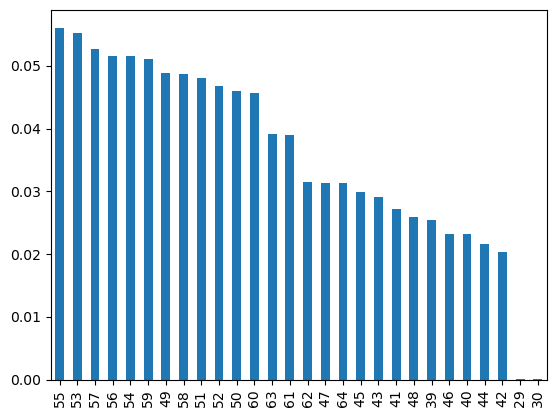

In [204]:
#df_train = resample_features(df_train.copy(), 1000, 'gender')
#df_train = resample_features(df_train.copy(), 1000, 'age')

df_train['age'].value_counts(normalize=df_train.shape[1]/2).plot(kind='bar')
plt.show()

#df_train['gender'].value_counts(normalize=df_train.shape[1]/2).plot(kind='bar')
#plt.show()

df_train['age_gr'] = pd.cut(df_train['age'], 5)
df_train[['cardio', 'age_gr']].groupby('age_gr').mean()
df_train.drop('age_gr', axis=1, inplace=True)

for df in df_combine:
    df.loc[df['age'] < 38, 'age'] = 0
    df.loc[(df['age'] >= 38) & (df['age'] < 47), 'age'] = 1
    df.loc[(df['age'] >= 47) & (df['age'] < 56), 'age'] = 2
    df.loc[df['age'] >= 55, 'age'] = 3
           
df_train.head()

df_train['weight_gr'] = pd.cut(df_train['weight'], 5)
df_train[['cardio', 'weight_gr']].groupby('weight_gr').mean()
df_train.drop('weight_gr', axis=1, inplace=True)

for df in df_combine:
    df.loc[df['weight'] < 48, 'weight'] = 0
    df.loc[(df['weight'] >= 48) & (df['weight'] < 86), 'weight'] = 1
    df.loc[(df['weight'] >= 86) & (df['weight'] < 124), 'weight'] = 2
    df.loc[(df['weight'] >= 124) & (df['weight'] < 162), 'weight'] = 3
    df.loc[df['weight'] >= 162, 'weight'] = 4
    df['weight'] = df['weight'].astype(int)

df_combine = [df_train, df_test]
df_train.head()

In [205]:
df_train.loc[df_train['weight'] <= 35]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
3752,5306,42,False,120,30.0,110,70,0,0,False,False,True,False
14722,21040,62,False,143,34.0,100,70,0,0,False,False,True,False
16322,23318,59,False,165,35.0,100,70,0,0,False,False,True,False
16906,24167,47,True,170,31.0,150,90,1,1,False,False,True,True
18559,26503,49,False,160,30.0,120,80,0,0,False,False,True,True
22016,31439,42,False,146,32.0,100,70,0,0,False,False,False,False
26806,38312,63,False,157,23.0,110,80,0,0,False,False,True,False
29488,42156,55,True,177,22.0,120,80,0,0,True,True,True,False
33511,47872,57,False,153,34.0,110,70,2,2,False,False,True,True
33817,48318,59,True,178,11.0,130,90,0,0,False,False,True,True


In [206]:
for df in df_combine:
    df.loc[df['weight'] <= 35, 'weight'] = df.loc[df['weight'] <= 35, 'height'] - 100
    df.loc[df['weight'] <= 35, 'weight'] = 35

In [207]:
display(df_test[df_test['ap_hi'] < df_test['ap_lo']])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
37,151,57,True,157,66.0,150,1000,2,0,True,True,False
285,975,43,True,170,72.0,12,80,1,0,False,False,True
487,1706,55,True,170,80.0,13,80,0,0,False,False,True
524,1822,51,False,160,113.0,140,1000,0,0,False,False,False
540,1882,52,False,161,83.0,140,1000,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
29790,99353,45,True,167,54.0,80,120,0,0,False,False,True
29792,99357,60,False,170,69.0,12,80,0,0,False,False,True
29884,99645,63,False,160,88.0,210,1000,2,2,False,False,True
29946,99850,57,False,162,74.0,160,1000,0,0,False,False,False


In [208]:
for df in df_combine:
    df['ap_hi_buff'] = df['ap_hi']
    df.loc[df['ap_hi'] < df['ap_lo'], 'ap_hi'] = df.loc[df['ap_hi'] < df['ap_lo'], 'ap_lo']
    df.loc[df['ap_hi_buff'] < df['ap_lo'], 'ap_lo'] = df.loc[df['ap_hi_buff'] < df['ap_lo'], 'ap_hi_buff']
    df.drop('ap_hi_buff', axis=1, inplace=True)

df_combine = [df_train, df_test]
display(df_train[df_train['ap_hi'] < df_train['ap_lo']])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [209]:
for df in df_combine:
    df['ap_hi'] = df['ap_hi'].abs()
    df.loc[df['ap_hi'] == 0, 'ap_hi'] = df['ap_hi'].median()
    df.loc[df['ap_hi'] <= 20, 'ap_hi'] *= 100
    df.loc[df['ap_hi'] <= 40, 'ap_hi'] *= 10
    df.loc[df['ap_hi'] >= 3000, 'ap_hi'] /= 100
    df.loc[df['ap_hi'] >= 400, 'ap_hi'] /= 10
    df['ap_hi'] = df['ap_hi'].astype('int')
    
df_combine = [df_train, df_test]

In [210]:
for df in df_combine:
    df['ap_lo'] = df['ap_lo'].abs()
    df.loc[df['ap_lo'] == 0, 'ap_lo'] = df['ap_lo'].median()
    df.loc[df['ap_lo'] <= 20, 'ap_lo'] *= 100
    df.loc[df['ap_lo'] <= 40, 'ap_lo'] *= 10
    df.loc[df['ap_lo'] >= 3000, 'ap_lo'] /= 100
    df.loc[df['ap_lo'] >= 400, 'ap_lo'] /= 10
    df['ap_lo'] = df['ap_lo'].astype('int')
    
df_combine = [df_train, df_test]

In [211]:
display(df_train[df_train['ap_hi'] > 240])
display(df_train[df_train['ap_lo'] > 240])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
40330,57646,55,False,162,50.0,309,80,0,0,False,False,True,False


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
418,594,45,False,157,72.0,150,300,0,0,False,False,True,True
5333,7590,57,False,164,102.0,120,300,1,0,False,False,True,False
33262,47533,55,True,174,91.0,120,300,0,0,False,False,True,True
36958,52813,49,False,171,82.0,160,300,0,0,False,False,False,True
50446,71992,56,True,170,77.0,120,300,0,0,False,False,True,False
62031,88577,57,False,169,75.0,120,300,0,0,False,False,True,False


In [212]:
for df in df_combine:
    df.loc[df['ap_hi'] > 240, 'ap_hi'] = df['ap_hi'].median()
    df.loc[df['ap_lo'] > 240, 'ap_lo'] = df['ap_lo'].median()

In [213]:
display(df_train[df_train['ap_hi'] > 240])
display(df_train[df_train['ap_lo'] > 240])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


df_train['ap_gr_hi'] = pd.cut(df_train['ap_hi'], 5)
display(df_train[['cardio', 'ap_gr_hi']].groupby('ap_gr_hi').mean())
df_train.drop('ap_gr_hi', axis=1, inplace=True)

df_train['ap_gr_lo'] = pd.cut(df_train['ap_lo'], 5)
df_train[['cardio', 'ap_gr_lo']].groupby('ap_gr_lo').mean()
df_train.drop('ap_gr_lo', axis=1, inplace=True)

for df in df_combine:
    df.loc[(df['ap_hi'] >= 40) & (df['ap_hi'] < 80), 'ap_hi'] = 0
    df.loc[(df['ap_hi'] >= 80) & (df['ap_hi'] < 120), 'ap_hi'] = 1
    df.loc[(df['ap_hi'] >= 120) & (df['ap_hi'] < 160), 'ap_hi'] = 2
    df.loc[(df['ap_hi'] >= 160) & (df['ap_hi'] < 200), 'ap_hi'] = 3
    df.loc[df['ap_hi'] >= 200, 'ap_hi'] = 4

df_combine = [df_train, df_test]
df_train.head()

for df in df_combine:
    df.loc[(df['ap_lo'] >= 40) & (df['ap_lo'] < 76), 'ap_lo'] = 0
    df.loc[(df['ap_lo'] >= 76) & (df['ap_lo'] < 112), 'ap_lo'] = 0
    df.loc[(df['ap_lo'] >= 112) & (df['ap_lo'] < 148), 'ap_lo'] = 2
    df.loc[(df['ap_lo'] >= 148) & (df['ap_lo'] < 184), 'ap_lo'] = 3
    df.loc[df['ap_lo'] >= 184, 'ap_lo'] = 4

df_combine = [df_train, df_test]
df_train.head()

In [214]:
features = df_train.drop(['id', 'height', 'cardio'], axis=1)
features_test = df_test.drop(['id', 'height'], axis=1)
target = df_train['cardio']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_VAL)

In [215]:
#to_scale = ['age','height','weight','ap_hi','ap_lo','cholesterol','gluc']
to_scale = ['age','weight','ap_hi','ap_lo','cholesterol','gluc']
#to_scale = ['ap_hi','ap_lo']

scaler = StandardScaler()
scaler.fit(features_train[to_scale])

features_train[to_scale] = scaler.transform(features_train[to_scale])
features_valid[to_scale] = scaler.transform(features_valid[to_scale])
features_test[to_scale] = scaler.transform(features_test[to_scale])

* No extra columns needed to extend train dataset.
* Column 'id' was removed becase it has no meaningful data
* All non binary columns were scaled with StandardScaler
* Dataset was splited to train and validation parts

## Train and compare models

In [216]:
lr_model = LogisticRegression(random_state=RANDOM_VAL, solver='liblinear')
lr_model.fit(features_train, target_train)

lr_prob_valid = lr_model.predict_proba(features_valid)
lr_score = roc_auc_score(target_valid, lr_prob_valid[:, 1])
print('LogisticRegression score:', lr_score)

LogisticRegression score: 0.790594585618352


In [217]:
dt_score = 0
dt_best_depth = 0
for depth in range(1, 80, 1):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_VAL)
    dt_model.fit(features_train, target_train)
    dt_prob_valid = dt_model.predict_proba(features_valid)
    curr_dt_score = roc_auc_score(target_valid, dt_prob_valid[:, 1])
    if curr_dt_score > dt_score:
        dt_score = curr_dt_score
        dt_best_depth = depth
        
print('DecisionTree score:', dt_score, 'for depth:', dt_best_depth)

DecisionTree score: 0.79428071306587 for depth: 7


In [218]:
rt_score = 0
rt_best_depth = 0
rt_best_est = 0
for dpth in range(11, 12, 2):
    for est in range(391, 392, 10):
        rt_model = RandomForestClassifier(max_depth=dpth, n_estimators=est, random_state=RANDOM_VAL)
        rt_model.fit(features_train, target_train)
        rt_prob_valid = rt_model.predict_proba(features_valid)
        curr_rt_score = roc_auc_score(target_valid, rt_prob_valid[:, 1])
        if curr_rt_score > rt_score:
            print('score updated, from:', rt_score, 'to:', curr_rt_score, 'with depth:', dpth, 'with est:', est)
            rt_score = curr_rt_score
            rt_best_est = est
            rt_best_depth = dpth
        
print('RandomForest score:', rt_score, 'with depth:', rt_best_depth, 'with est:', rt_best_est)

score updated, from: 0 to: 0.8023920246349439 with depth: 11 with est: 391
RandomForest score: 0.8023920246349439 with depth: 11 with est: 391


In [219]:
rt_model = RandomForestClassifier(max_depth=11, n_estimators=391, random_state=RANDOM_VAL)
rt_model.fit(features_train, target_train)
rt_prob_valid = rt_model.predict_proba(features_valid)
rt_score = roc_auc_score(target_valid, rt_prob_valid[:, 1])
print('RandomForest score:', rt_score)


RandomForest score: 0.8023920246349439


In [220]:
predicted_test = rt_model.predict_proba(features_test)

df_dest_res = pd.DataFrame(columns=['id', 'cardio'])
df_dest_res['id'] = df_test['id']
df_dest_res['cardio'] = predicted_test[:, 1]

df_dest_res.to_csv("submission.csv", index=False)

In [221]:
model_path = '/kaggle/working/models/rt_model.pcl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
with open(model_path, 'wb') as fid:
    dump(rt_model, fid)

In [222]:
for itr_num in range(1, 6):
    sanity_test_target = np.random.choice([0, 1], size=len(df_test))
    sanity_check_score = rt_model.score(features_test, sanity_test_target)
    print('sanity check score:', sanity_check_score, 'on iteration:', itr_num)

sanity check score: 0.49946666666666667 on iteration: 1
sanity check score: 0.5051333333333333 on iteration: 2
sanity check score: 0.5013333333333333 on iteration: 3
sanity check score: 0.4963 on iteration: 4
sanity check score: 0.49573333333333336 on iteration: 5
